# Biden BOW negatív modell 

libek 

In [1]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import glob
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords 



Adatok beolvasása, duplikáció szűrés

In [2]:
csv1 = "pedojoe"
csv2 = "creepyjoebiden"

####################

all_files1 = glob.glob('data/' + csv1 + '*.csv')
all_files2 = glob.glob('data/' + csv2 + '*.csv')
all_files  = all_files1 + all_files2


li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
print(df.shape)

#duplikáció kiszűrés tweet azonosítón
df = df.drop_duplicates(subset=['tweetID'])
print(df.shape)


df['date'] = pd.to_datetime(df.letoltes_datum, format='%Y-%m-%d')
biden=df
print(biden.shape)

(112682, 24)
(45734, 24)
(45734, 25)


Külföldi adatok szűrése

In [3]:
man = pd.read_csv('location_man.csv', index_col=None, header=0, sep=";", encoding= 'unicode_escape')
df2 = df.set_index('userLocation').join(man.set_index('userLocation')).reset_index()
df2.to_csv('df2.csv',index=False, sep=';', encoding = "utf-8")

df3 = df2[df2['usa'] != 'no']

print(df3.shape)



(44818, 30)


Szövegtisztítás, stemming, tokenize, stop word, számok, hashtagek, url-ek

In [4]:
def remove_content(text):
    text = re.sub(r"http\S+", "", text) #remove urls
    text=re.sub(r'\S+\.com\S+','',text) #remove urls
    text=re.sub(r'\@\w+','',text) #remove mentions
    text =re.sub(r'\#\w+','',text) #remove hashtags
    return text
def process_text(text, stem=False): #clean text
    text=remove_content(text)
    text = re.sub('[^A-Za-z]', ' ', text.lower()) #remove non-alphabets
    tokenized_text = word_tokenize(text) #tokenize
    clean_text = [
         word for word in tokenized_text
         if word not in stop_words
    ]
    if stem:
        clean_text=[stemmer.stem(word) for word in clean_text]
    return ' '.join(clean_text)

Saját stop word-ok

In [5]:
newStopWords = ['rt','via', 'dr', 'ex', 'biden', 'please', 'retweet', 'think', 'white', 'house']

In [6]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(newStopWords)
stop_words=stopwords

df3['cleaned_tweets']=df3['tweetText'].apply(lambda x: process_text(x))


C:\Users\laszl\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
df3['cleaned_tweets'].head()

0        diary wimpy mayor
1              people sick
2              get obvious
3     know view never know
4    cut speaking seen amp
Name: cleaned_tweets, dtype: object

Szófelhő ábrázolása

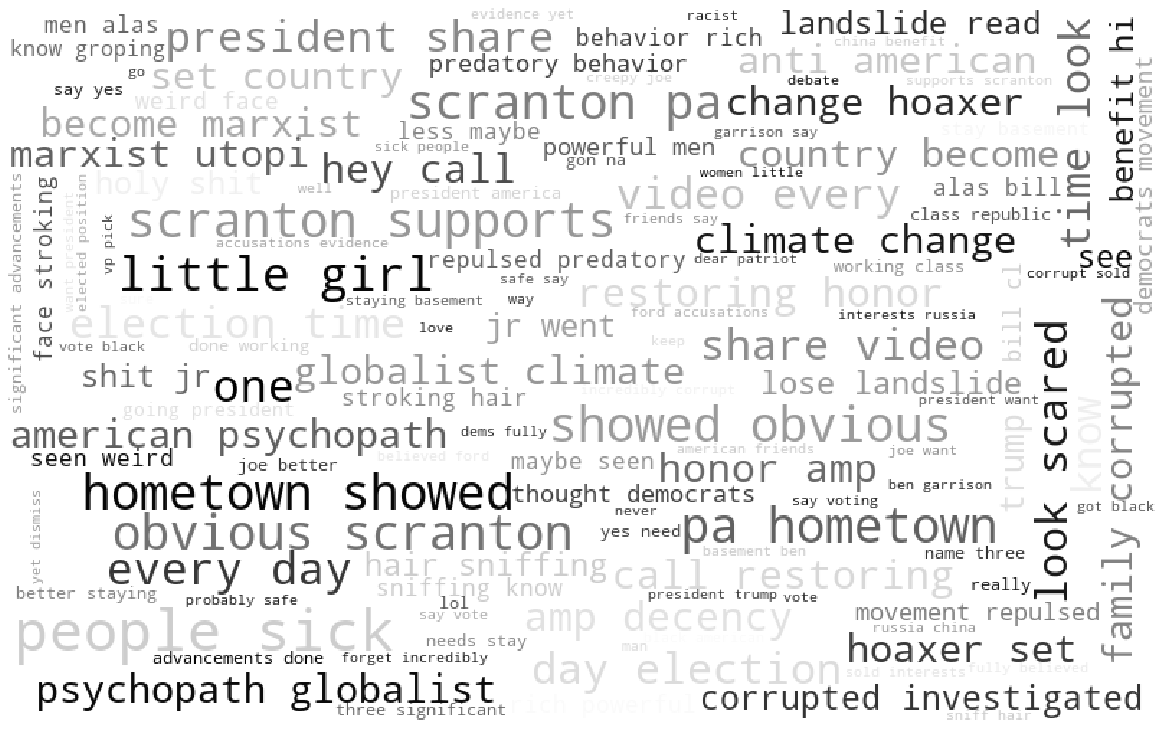

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
temp=' '.join(df3['cleaned_tweets'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_font_size = 40, max_words=300, random_state=1,
                      colormap="gist_gray").generate(temp)
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()
wordcloud.to_file("biden_neg.png")